In [20]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Make pretty plots and graphs :)

pd.set_option('display.mpl_style','default')
plt.rcParams['figure.figsize'] = (15,5)

In [22]:
broken_df = pd.read_csv('../data/bikes.csv', encoding='latin1')
broken_df[:5]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


Not the expected output. The file is in latin1 encoding, so we need to convert it to utf-8

Dates should be formatted to date type

In [23]:
broken_df.columns

Index(['Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)'], dtype='object')

This is showing just one column. As the delimiter is ; we should inform pd about it

More changes:

1. Day is first in the date, this should be informed as well
2. Set the index to date column

In [24]:
fixed_df = pd.read_csv('../data/bikes.csv', encoding='latin1', delimiter=';', parse_dates=['Date'], 
                        dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# Selecting a column

In [25]:
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

## Check if any columns have empty values i.e., NaN

After executing below cell, we get two empty columns

In [26]:
fixed_df.count()

Berri 1                                310
Brébeuf (données non disponibles)        0
Côte-Sainte-Catherine                  310
Maisonneuve 1                          310
Maisonneuve 2                          310
du Parc                                310
Pierre-Dupuy                           310
Rachel1                                310
St-Urbain (données non disponibles)      0
dtype: int64

# Lets plot a graph for a column

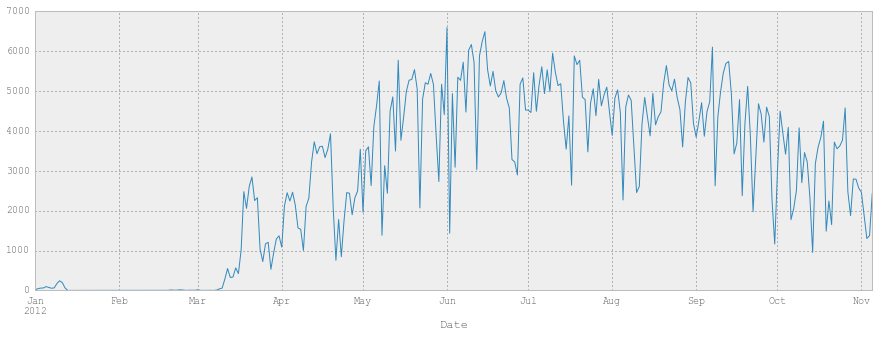

In [27]:
fixed_df['Rachel1'].plot()

In [28]:
fixed_df['Berri 1'].count()

310

## Lets plot a graph for all columns

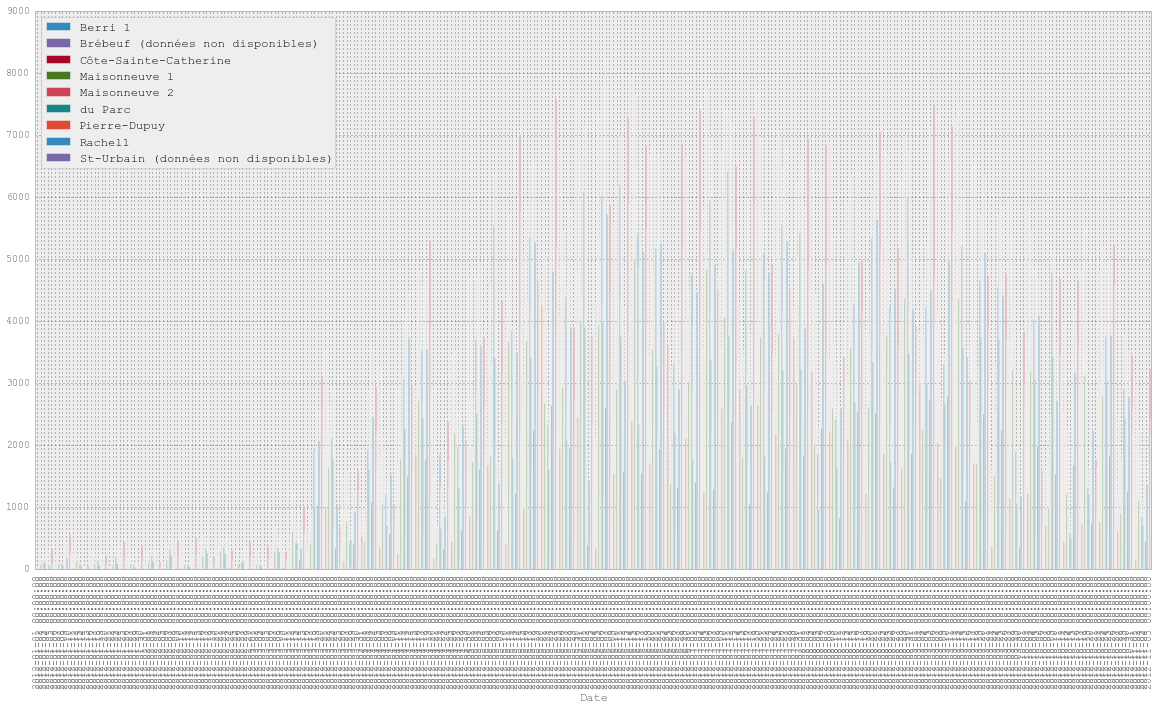

In [29]:
fixed_df.plot(figsize=(20,10),kind='bar')

In [30]:
fixed_df.count()

Berri 1                                310
Brébeuf (données non disponibles)        0
Côte-Sainte-Catherine                  310
Maisonneuve 1                          310
Maisonneuve 2                          310
du Parc                                310
Pierre-Dupuy                           310
Rachel1                                310
St-Urbain (données non disponibles)      0
dtype: int64

## lets drop those two empty columns from the data frame

In [31]:
#fixed_df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1',parse_dates=True, index_col='Date', )
fixed_df = fixed_df.drop(['Brébeuf (données non disponibles)','St-Urbain (données non disponibles)'], axis=1)

In [32]:
fixed_df.count()

Berri 1                  310
Côte-Sainte-Catherine    310
Maisonneuve 1            310
Maisonneuve 2            310
du Parc                  310
Pierre-Dupuy             310
Rachel1                  310
dtype: int64

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

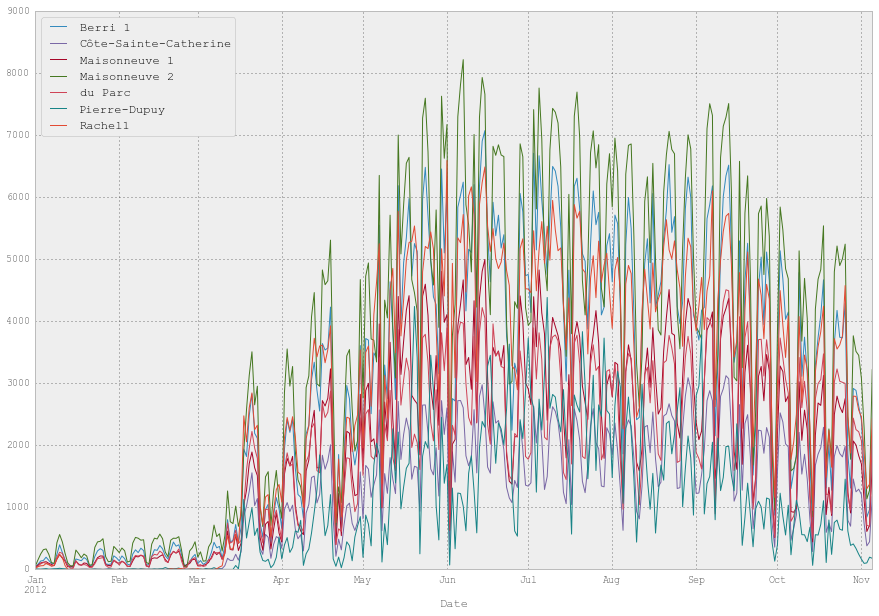

In [33]:
# Lets plot again
fixed_df.plot(figsize=(15,10))